### Carga de Librerias

In [1]:
import pandas as pd # Librería para la manipulación y el análisis de datos
import numpy as np # Librería para la manipulación de datos y para la ejecución de operaciones matemáticas
import matplotlib.pyplot as plt # Librería para la visualización de datos
import seaborn as sns # Librería para la visualización de datos
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder 

### Carga de DF

In [2]:
bmw = pd.read_csv("bmw_pricing.csv")

## Exploracion de datos

In [3]:
bmw

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


In [4]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [5]:
bmw.duplicated().any()

False

In [6]:
bmw.isnull().any()

marca                           True
modelo                          True
km                              True
potencia                        True
fecha_registro                  True
tipo_gasolina                   True
color                           True
tipo_coche                      True
volante_regulable               True
aire_acondicionado              True
camara_trasera                  True
asientos_traseros_plegables     True
elevalunas_electrico            True
bluetooth                       True
gps                            False
alerta_lim_velocidad            True
precio                          True
fecha_venta                     True
dtype: bool

In [7]:
bmw.duplicated().sum()

0

### Hipotesis eliminación columnas

In [8]:
# Calcular la cantidad de valores nulos por columna
nulos_por_columna = bmw.isnull().sum()

# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (nulos_por_columna / len(bmw)) * 100

# Calcular la cantidad de valores únicos por columna
valores_unicos_por_columna = bmw.nunique()

# Crear un nuevo DataFrame con los resultados
resultado = pd.DataFrame({
    'Cantidad de Nulos': nulos_por_columna,
    'Porcentaje de Nulos': porcentaje_nulos,
    'Valores Únicos': valores_unicos_por_columna
})

In [9]:
resultado

,Cantidad de Nulos,Porcentaje de Nulos,Valores Únicos
marca,970,20.028908,1
modelo,3,0.061945,76
km,2,0.041297,4784
potencia,1,0.020648,61
fecha_registro,2423,50.030973,180
tipo_gasolina,5,0.103242,5
color,445,9.188520,10
tipo_coche,1460,30.146603,8
volante_regulable,4,0.082593,2
aire_acondicionado,486,10.035102,2


Ahora vamos a realizar el analisis con el porcentaje de nulos, puesto que tenemos dos outliers, como fecha_registro y asiento_traseros_plegables, en base a esto, podemos hacernos dos preguntas: eliminarlo o no eliminarlo e imputar estos nulos.

En este caso, podemos ver que en el caso de "marca" únicamente tenemos una sola marca por ello vamos a comprobar si, tenemos una marca, por ello vamos a analizar los modelos que tenemos para ver si es posible borrar la marca.

## Justificación eliminacion columnas

In [10]:
modelos_con_marca = bmw[bmw['marca'].notnull()]['modelo'].unique()

In [11]:
modelos_con_marca

array(['M4', '320', '420', '425', '335', '325', '118', '120', '220',
       '650', 'Z4', '135', '318', '430', '218', 'M3', '330', '225', '316',
       '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '430 Gran Coupé', '635', '520', nan, '525', '530', '535',
       '320 Gran Turismo', '116', '518', '328', '523', 'X3', 'M550',
       '325 Gran Turismo', '318 Gran Turismo', '125', 'i3',
       '520 Gran Turismo', '420 Gran Coupé', '530 Gran Turismo', '114',
       'M135', '330 Gran Turismo', '418 Gran Coupé', '335 Gran Turismo',
       '730', '123', '535 Gran Turismo', '740', '750', '528',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '216 Gran Tourer', '216 Active Tourer', ' Active Tourer',
       '214 Gran Tourer'], dtype=object)

In [12]:
modelos_sin_marca = bmw[bmw['marca'].isnull()]['modelo'].unique()

In [13]:
modelos_sin_marca

array(['118', 'Z4', '325', '218', '120', 'M235', '425', '435', '640',
       '420', '220', 'M4', '320', '630', '318', '520', '316', '535',
       '525', '518', '530', 'M550', '330', '116', '528', '328', '125',
       '420 Gran Coupé', '114', '320 Gran Turismo', '318 Gran Turismo',
       '530 Gran Turismo', '418 Gran Coupé', '520 Gran Turismo', '135',
       '435 Gran Coupé', '640 Gran Coupé', '740', '730', 'X1', 'X3', 'X5',
       'X6', 'X4', 'X6 M', 'X5 M', 'X5 M50', '220 Active Tourer',
       '218 Active Tourer', '225 Active Tourer', '218 Gran Tourer'],
      dtype=object)

Tal y como podemos ver, los modelos que no tienen marca y los modelos que tienen marca, tienen una denominación parecida e incluso hay mucho que se repiten, en base a esta decisión vamos a eliminar la marca.

In [14]:
columnas = ["tipo_gasolina", "color", "tipo_coche", "volante_regulable", "aire_acondicionado", 
            "camara_trasera", "asientos_traseros_plegables", "elevalunas_electrico", "bluetooth", 
            "gps", "alerta_lim_velocidad"]

for columna in columnas:
    value_counts = bmw[columna].value_counts()
    porcentaje = (value_counts / value_counts.sum()) * 100
    print(f"Distribución en porcentaje para {columna}:\n{porcentaje}\n")

Distribución en porcentaje para tipo_gasolina:
tipo_gasolina
diesel           95.721372
petrol            3.947912
hybrid_petrol     0.165358
Diesel            0.103348
electro           0.062009
Name: count, dtype: float64

Distribución en porcentaje para color:
color
black     34.083674
grey      24.329241
blue      14.711232
white     11.005002
brown      6.866758
silver     6.639382
red        1.068668
beige      0.841291
green      0.318327
orange     0.136426
Name: count, dtype: float64

Distribución en porcentaje para tipo_coche:
tipo_coche
estate         32.722436
sedan          24.268401
suv            22.317470
hatchback      14.425067
subcompact      2.276086
coupe           2.246527
convertible     0.886787
van             0.857227
Name: count, dtype: float64

Distribución en porcentaje para volante_regulable:
volante_regulable
True     55.011366
False    44.988634
Name: count, dtype: float64

Distribución en porcentaje para aire_acondicionado:
aire_acondicionado
True     7

In [15]:
bmw['color'].isnull().sum()



445

In [16]:
bmw[bmw['asientos_traseros_plegables'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
6,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,BMW,218 Gran Tourer,66770.0,110.0,NaN,diesel,blue,van,False,True,False,NaN,False,False,True,False,13400.0,2018-07-01
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01


In [17]:
bmw[bmw['modelo'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,BMW,NaN,146338.0,105.0,NaN,diesel,black,NaN,False,True,False,NaN,False,NaN,True,NaN,13300.0,2018-08-01
4766,BMW,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,NaN,True,False,True,False,14900.0,2018-09-01
4802,BMW,NaN,118640.0,110.0,NaN,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-03-01


Eliminar nulos de la columna modelo, no se pude determinar cual seria

In [18]:
modelos_vacios = bmw[bmw["modelo"].isnull()].index
modelos_vacios


Index([173, 4766, 4802], dtype='int64')

In [19]:
bmw[(bmw["potencia"] == 105.0) & (bmw["tipo_gasolina"] == "diesel") & (bmw["color"] == "black")]["modelo"].unique()
# (bmw["tipo_coche"] == "suv")

array([nan, '318', '518', '118', '318 Gran Turismo', '418 Gran Coupé',
       'X1', 'X3'], dtype=object)

En base a esta respuesta, hay demasiados modelos con la misma potencia como para definir que modelo es, por ende, hemos decidido borrarlo.

In [20]:
bmw = bmw.drop(index=modelos_vacios)

In [21]:
columnas = ["tipo_gasolina", "color", "tipo_coche", "volante_regulable", "aire_acondicionado", 
            "camara_trasera", "elevalunas_electrico", "bluetooth", 
            "gps", "alerta_lim_velocidad"]

for columna in columnas:
    value_counts = bmw[columna].value_counts()
    porcentaje = (value_counts / value_counts.sum()) * 100
    print(f"Distribución en porcentaje para {columna}:\n{porcentaje}\n")

Distribución en porcentaje para tipo_gasolina:
tipo_gasolina
diesel           95.718718
petrol            3.950362
hybrid_petrol     0.165460
Diesel            0.103413
electro           0.062048
Name: count, dtype: float64

Distribución en porcentaje para color:
color
black     34.084187
grey      24.345848
blue      14.721274
white     10.989761
brown      6.871445
silver     6.621160
red        1.069397
beige      0.841866
green      0.318544
orange     0.136519
Name: count, dtype: float64

Distribución en porcentaje para tipo_coche:
tipo_coche
estate         32.732111
sedan          24.275577
suv            22.294500
hatchback      14.429332
subcompact      2.276759
coupe           2.247191
convertible     0.887049
van             0.857481
Name: count, dtype: float64

Distribución en porcentaje para volante_regulable:
volante_regulable
True     55.045492
False    44.954508
Name: count, dtype: float64

Distribución en porcentaje para aire_acondicionado:
aire_acondicionado
True     7

## Eliminacion de columnas

Eliminaremos Marca ya que se puede asumir que son todos bmw, tambien eliminar asientos_traseros_plegables por la cantidad de nulos que tiene y no se puede saber los valroes nulos, y por ultimo eliminamos gps y tipo_gasolina ya que no tienen un buena distribucion, la mayoria estan concentrados en un mismo valor.

In [22]:
bmw.drop(columns=['marca','asientos_traseros_plegables','gps', 'tipo_gasolina'], inplace=True)

## Tratamiento duplicados

In [23]:
bmw[bmw.duplicated(keep=False)]


,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,fecha_venta


Por otro lado no tenemos ningun duplicado, por ello podemos avanzar.

Me he dado cuenta de que he añadido un monton de columnas con la denominación de 105, puesto que antes he pasado un .unique = 105 en vez de utilizar el doble ==, vamos a eliminarlas.

## Variables y valores

In [24]:
for i in bmw.columns: # Loop en las columnas del df
    print('\n',i,bmw[i].unique(),'\n') # Print nombre de la columna y valores únicos de ésta


 modelo ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' ' Active Tourer'
 '225 Active Tourer' '214 Gran Tourer'] 


 km [140411.  13929. 183297. ...  19633.  27920. 195840.] 


 potencia [100. 317. 120. 135. 160. 225. 145. 105. 125. 130. 270. 110. 140. 180.
  85. 190. 236. 240. 250. 230. 309. 170. 142. 155. 210.  nan 122. 200.
  90. 150. 141. 173. 137. 280. 112. 1

Vamos a ver el número de veces que aparece cada valor de las distintas columnas del df.

In [25]:
for i in bmw.columns: # Loop en las columnas del df
    print('\n',i,bmw[i].value_counts(),'\n') 
    # Print del número de veces que aparece cada valor distinto de la columna


 modelo modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64 


 km km
127499.0    2
193202.0    2
129317.0    2
180232.0    2
124822.0    2
           ..
96491.0     1
133178.0    1
105959.0    1
193231.0    1
195840.0    1
Name: count, Length: 4781, dtype: int64 


 potencia potencia
135.0    882
120.0    785
85.0     631
100.0    570
105.0    449
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: count, Length: 61, dtype: int64 


 fecha_registro fecha_registro
2013-07-01    93
2014-03-01    83
2014-05-01    81
2013-01-01    78
2013-10-01    77
              ..
2007-01-01     1
1990-03-01     1
2006-11-01     1
1994-01-01     1
2005-09-01     1
Name: count, Length: 180, dtype: int64 


 color color
black     

In [26]:
bmw

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,black,NaN,True,True,False,True,NaN,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,grey,convertible,True,True,False,False,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,white,NaN,False,False,False,True,False,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,red,convertible,True,True,False,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,silver,NaN,True,True,False,False,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,NaN,black,NaN,False,True,False,False,False,False,14600.0,2018-08-01
4839,218 Active Tourer,49832.0,100.0,2015-06-01,grey,NaN,False,True,False,False,False,True,17500.0,2018-08-01
4840,218 Gran Tourer,19633.0,110.0,2015-10-01,grey,van,False,True,False,False,False,True,17000.0,2018-09-01
4841,218 Active Tourer,27920.0,110.0,2016-04-01,brown,van,True,True,False,False,False,True,22700.0,2018-09-01


Creacion de una nueva columna Años de uso a partir de la columna fecha_registro y fecha venta

In [27]:
# Convertir las columnas de fecha a tipo datetime
bmw["fecha_registro"] = pd.to_datetime(bmw["fecha_registro"], errors='coerce')
bmw["fecha_venta"] = pd.to_datetime(bmw["fecha_venta"], errors='coerce')

# Extraer solo el año
bmw["año_registro"] = bmw["fecha_registro"].dt.year
bmw["año_venta"] = bmw["fecha_venta"].dt.year


In [28]:
bmw.drop(columns=["fecha_registro", "fecha_venta"], inplace=True)

In [29]:
bmw['años_uso']= bmw['año_venta']-bmw['año_registro']

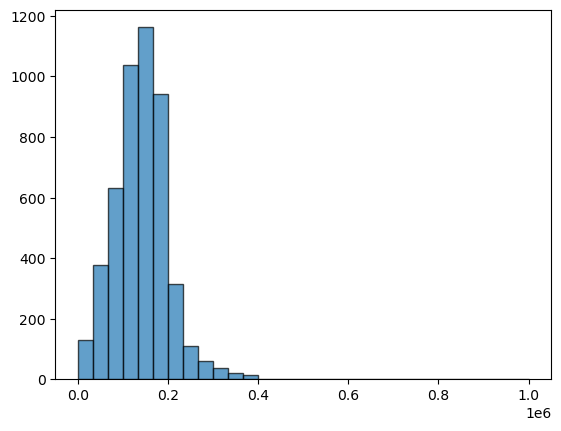

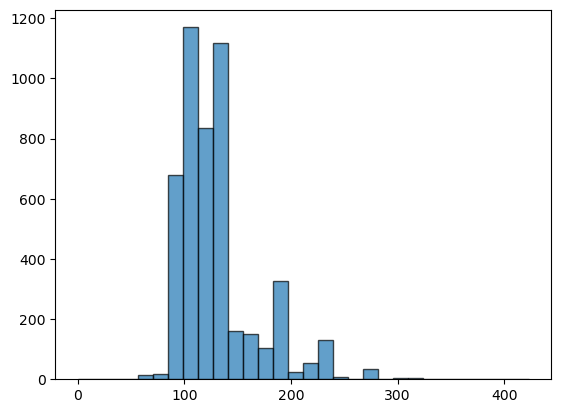

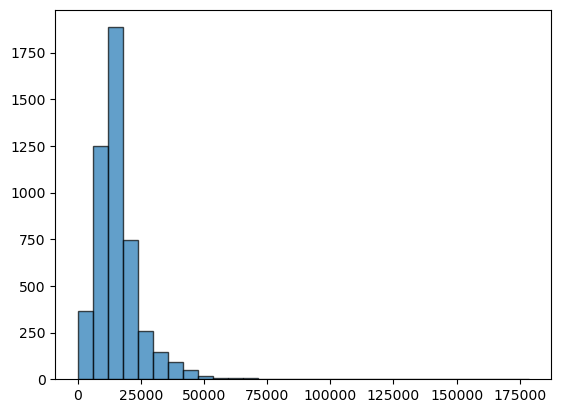

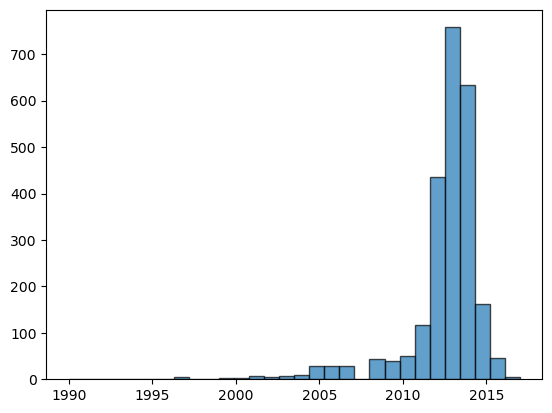

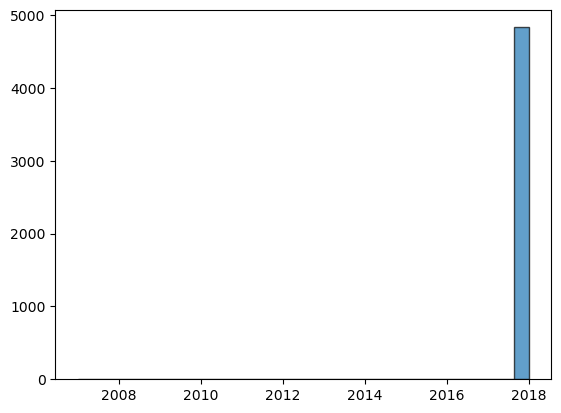

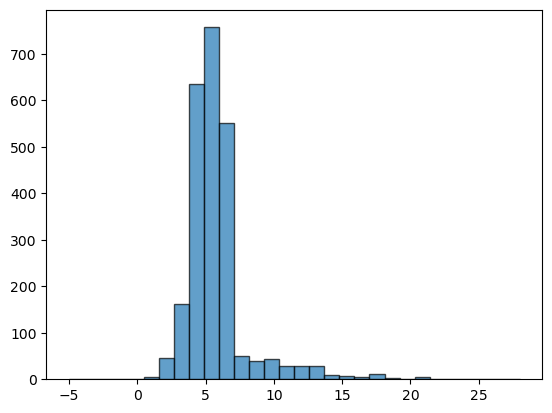

In [30]:
columnas_numericas = bmw.select_dtypes(include=["number"]).columns

# Crear histogramas para cada columna numérica
for columna in columnas_numericas:
    plt.hist(bmw[columna].dropna(), bins=30, edgecolor="black", alpha=0.7)  # Crear histograma
    plt.show()  

Se observa que hay valroes negativos en años_uso y se proceden a eliminar ya que no es posible

In [31]:
añonegativo = bmw[bmw['años_uso'] < 0].index

In [32]:
bmw = bmw.drop(index=añonegativo)

In [33]:
bmw['año_registro'].isnull().sum()


2421

### Año registro

Se observan valores nulos en Año registro por lo que vamos a ver que podemos hacer en ellos 
En primer lugar vamos a imputar la moda por modelo, potencia y precio, pero vimos que aun teniamos nulos, por lo que lo hicimos por modelo y potencia, y por ultimo solo por modelo.
pero aun hay 18 lineas sin año de regsitro ya que son modelos que no se repiten

In [34]:
bmw['año_registro'].isnull().sum()

2421

In [35]:
bmw['año_registro'] = bmw['año_registro'].fillna(bmw.groupby(['modelo', 'potencia', 'precio'])['año_registro'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [36]:
bmw['año_registro'].isnull().sum()

1292

In [37]:
bmw['año_registro'] = bmw['año_registro'].fillna(bmw.groupby(['modelo', 'potencia'])['año_registro'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [38]:
bmw['año_registro'].isnull().sum()

71

In [39]:
bmw['año_registro'] = bmw['año_registro'].fillna(bmw.groupby(['modelo'])['año_registro'].transform(lambda x: round(x.mean()) if not x.isnull().all() else np.nan))

In [40]:
bmw['año_registro'].isnull().sum()

18

In [41]:
bmw[bmw['año_registro'].isnull()]

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,año_registro,año_venta,años_uso
4,425,97097.0,160.0,silver,NaN,True,True,False,False,True,True,33400.0,NaN,2018.0,NaN
17,650,24521.0,270.0,grey,convertible,True,False,False,False,False,False,9200.0,NaN,2018.0,NaN
37,650,24452.0,270.0,grey,NaN,True,False,False,False,False,False,6800.0,NaN,2018.0,NaN
55,225,78638.0,160.0,black,coupe,False,True,False,False,True,True,18300.0,NaN,2018.0,NaN
57,M235,34082.0,240.0,grey,coupe,False,True,True,True,True,NaN,30200.0,NaN,2018.0,NaN
61,425,56250.0,160.0,blue,coupe,False,False,False,False,False,True,28600.0,NaN,2018.0,NaN
84,M235,69736.0,240.0,grey,NaN,True,True,True,True,True,False,30000.0,NaN,2018.0,NaN
90,i8,12402.0,170.0,grey,coupe,True,True,False,False,False,True,95200.0,NaN,2018.0,NaN
102,M235,37619.0,240.0,black,NaN,True,False,False,True,True,True,27700.0,NaN,2018.0,NaN
107,630,149943.0,190.0,black,coupe,True,True,True,True,True,True,10500.0,NaN,2018.0,NaN


Se vuelve a aplicar aplicar la formula en años_uso para que actualice los na que se rellenaron

In [42]:
bmw['años_uso']= bmw['año_venta']-bmw['año_registro']

### Colores

(array([1496.,    0.,    0., 1070.,    0.,    0.,  483.,    0.,    0.,
           0.,   47.,    0.,    0.,  291.,    0.,    0.,  647.,    0.,
           0.,    0.,    6.,    0.,    0.,   37.,    0.,    0.,  302.,
           0.,    0.,   14.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6, 6.9, 7.2, 7.5,
        7.8, 8.1, 8.4, 8.7, 9. ]),
 <BarContainer object of 30 artists>)

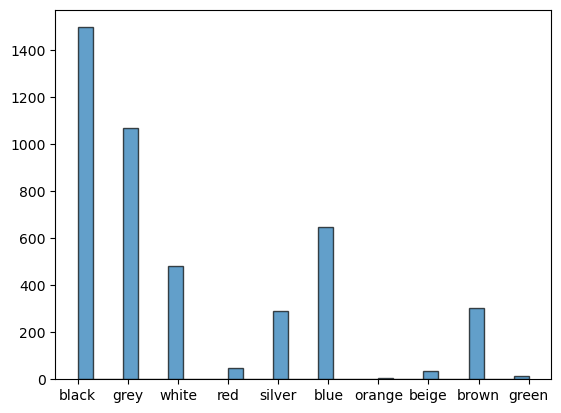

In [43]:
plt.hist(bmw['color'].dropna(), bins=30, edgecolor="black", alpha=0.7)

Se observa que estos son los valores con mas frecuencia, por lo que utliziaremos estos, y todos los demas los identificaremos como "otro"
black     34.083674
grey      24.329241
blue      14.711232
white     11.005002
brown      6.866758
silver     6.639382

In [44]:
colores_permitidos = {"black", "grey", "blue", "white", "brown", "silver"}

def asignar_color(color):
    if color in colores_permitidos:
        return color
    else:
        return "otro_color"


In [45]:

bmw['color'] = bmw['color'].apply(asignar_color)

In [46]:
bmw['color'].isnull().sum()

0

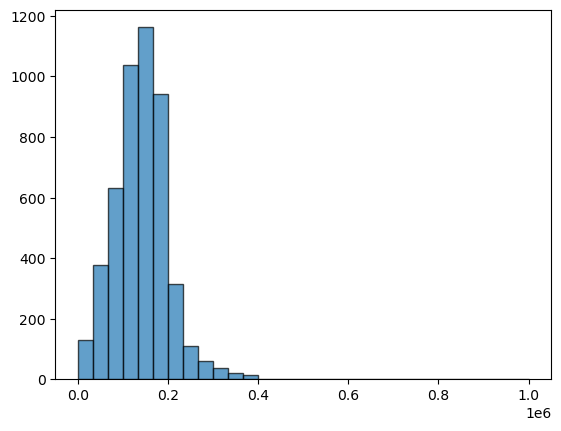

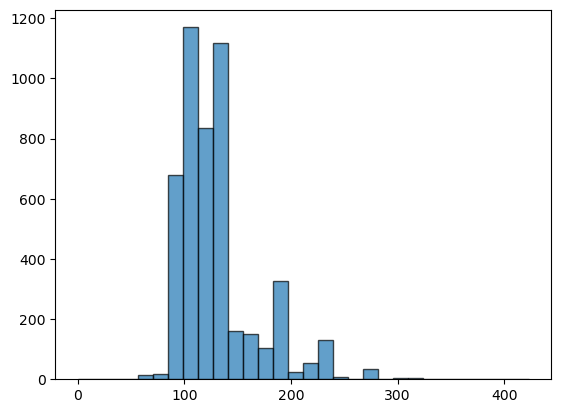

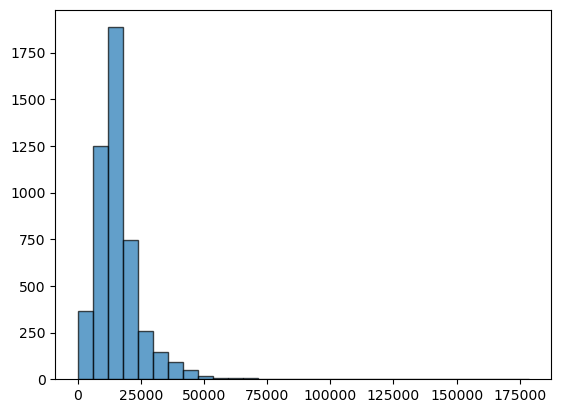

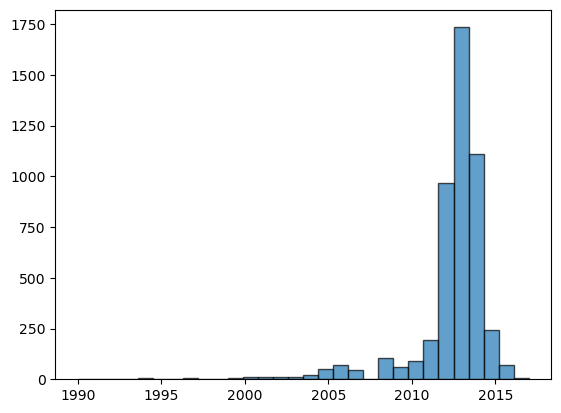

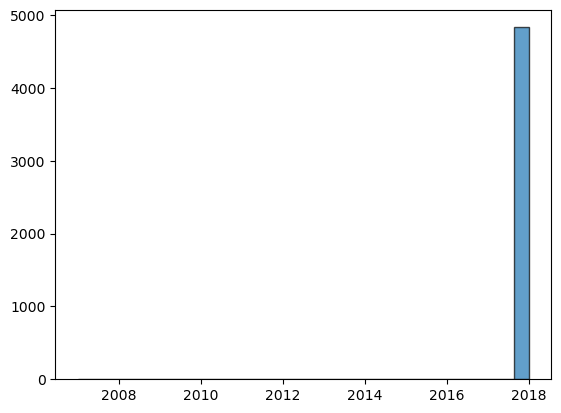

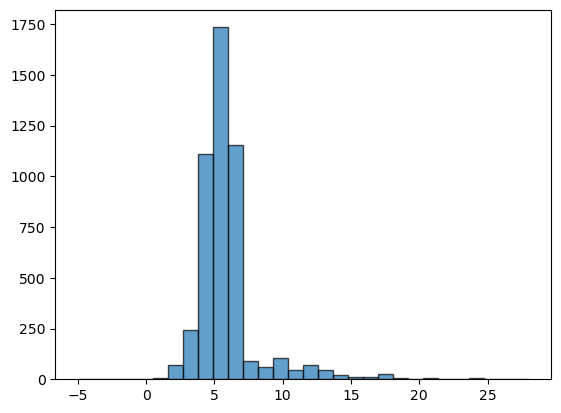

In [47]:
columnas_numericas = bmw.select_dtypes(include=["number"]).columns

# Crear histogramas para cada columna numérica
for columna in columnas_numericas:
    plt.hist(bmw[columna].dropna(), bins=30, edgecolor="black", alpha=0.7)  # Crear histograma
    plt.show() 

### Tipo coche

rellenar na en tipo_coche en base a la moda del tipo de coche y model sin tener en cuenta los nulos

In [48]:
bmw['tipo_coche'].isnull().sum()

1457

In [49]:
bmw['tipo_coche'] = bmw['tipo_coche'].fillna(bmw.groupby(['modelo', 'potencia','precio'])['tipo_coche'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [50]:
bmw['tipo_coche'] = bmw['tipo_coche'].fillna(bmw.groupby(['modelo', 'potencia'])['tipo_coche'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [51]:
bmw['tipo_coche'] = bmw['tipo_coche'].fillna(bmw.groupby(['modelo'])['tipo_coche'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [52]:
bmw['tipo_coche'].isnull().sum()

0

In [53]:
nulos_por_columna2 = bmw.isnull().sum()
porcentaje_nulos2 = (nulos_por_columna2 / len(bmw)) * 100
valores_unicos_por_columna2 = bmw.nunique()
resultado2 = pd.DataFrame({
    'Cantidad de Nulos': nulos_por_columna2,
    'Porcentaje de Nulos': porcentaje_nulos2,
    'Valores Únicos': valores_unicos_por_columna2})

In [54]:
resultado2

,Cantidad de Nulos,Porcentaje de Nulos,Valores Únicos
modelo,0,0.000000,76
km,2,0.041339,4779
potencia,1,0.020670,61
color,0,0.000000,7
tipo_coche,0,0.000000,8
volante_regulable,4,0.082679,2
aire_acondicionado,485,10.024804,2
camara_trasera,2,0.041339,2
elevalunas_electrico,2,0.041339,2
bluetooth,727,15.026871,2


### Aire acondicionado, bluetooth, alerta_lim_velocidad


Se toma el mismo pensamiento que para el año de registro para rellenar estos valores

In [55]:
bmw['aire_acondicionado'].isnull().sum()

485

In [56]:
bmw['aire_acondicionado'] = bmw['aire_acondicionado'].fillna(bmw.groupby(['modelo', 'potencia','precio'])['aire_acondicionado'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [57]:
bmw['aire_acondicionado'].isnull().sum()

221

In [58]:
bmw['aire_acondicionado'] = bmw['aire_acondicionado'].fillna(bmw.groupby(['modelo', 'potencia'])['aire_acondicionado'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [59]:
bmw['aire_acondicionado'].isnull().sum()

12

In [60]:
bmw['aire_acondicionado'] = bmw['aire_acondicionado'].fillna(bmw.groupby(['modelo'])['aire_acondicionado'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [61]:
bmw['aire_acondicionado'].isnull().sum()

2

In [62]:
bmw['bluetooth'].isnull().sum()

727

In [63]:
bmw['bluetooth'] = bmw['bluetooth'].fillna(bmw.groupby(['modelo', 'potencia','precio'])['bluetooth'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [64]:
bmw['bluetooth'].isnull().sum()

317

In [65]:
bmw['bluetooth'] = bmw['bluetooth'].fillna(bmw.groupby(['modelo', 'potencia'])['bluetooth'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [66]:
bmw['bluetooth'].isnull().sum()

14

In [67]:
bmw['bluetooth'] = bmw['bluetooth'].fillna(bmw.groupby(['modelo'])['bluetooth'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [68]:
bmw['bluetooth'].isnull().sum()

1

In [69]:
bmw['alerta_lim_velocidad'].isnull().sum()

726

In [70]:
bmw['alerta_lim_velocidad'] = bmw['alerta_lim_velocidad'].fillna(bmw.groupby(['modelo', 'potencia','precio'])['alerta_lim_velocidad'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [71]:
bmw['alerta_lim_velocidad'].isnull().sum()

326

In [72]:
bmw['alerta_lim_velocidad'] = bmw['alerta_lim_velocidad'].fillna(bmw.groupby(['modelo', 'potencia'])['alerta_lim_velocidad'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [73]:
bmw['alerta_lim_velocidad'].isnull().sum()

12

In [74]:
bmw['alerta_lim_velocidad'] = bmw['alerta_lim_velocidad'].fillna(bmw.groupby(['modelo'])['alerta_lim_velocidad'].transform(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan))

In [75]:
bmw['alerta_lim_velocidad'].isnull().sum()

1

### Tratamiento de nulos

In [76]:
nulos_por_columna3 = bmw.isnull().sum()
porcentaje_nulos3 = (nulos_por_columna3 / len(bmw)) * 100
valores_unicos_por_columna3 = bmw.nunique()
resultado3 = pd.DataFrame({
    'Cantidad de Nulos': nulos_por_columna3,
    'Porcentaje de Nulos': porcentaje_nulos3,
    'Valores Únicos': valores_unicos_por_columna3})

In [77]:
resultado3

,Cantidad de Nulos,Porcentaje de Nulos,Valores Únicos
modelo,0,0.000000,76
km,2,0.041339,4779
potencia,1,0.020670,61
color,0,0.000000,7
tipo_coche,0,0.000000,8
volante_regulable,4,0.082679,2
aire_acondicionado,2,0.041339,2
camara_trasera,2,0.041339,2
elevalunas_electrico,2,0.041339,2
bluetooth,1,0.020670,2


In [78]:
bmw.dropna(inplace=True)

In [79]:
bmw.isnull().sum()

modelo                  0
km                      0
potencia                0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
alerta_lim_velocidad    0
precio                  0
año_registro            0
año_venta               0
años_uso                0
dtype: int64

In [80]:
bmw.reset_index(drop=True, inplace=True)

In [81]:
bmw

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,año_registro,año_venta,años_uso
0,118,140411.0,100.0,black,hatchback,True,True,False,True,0.0,0.0,11300.0,2012.0,2018.0,6.0
1,M4,13929.0,317.0,grey,convertible,True,True,False,False,True,True,69700.0,2015.0,2018.0,3.0
2,320,183297.0,120.0,white,estate,False,False,False,True,False,False,10200.0,2012.0,2018.0,6.0
3,420,128035.0,135.0,otro_color,convertible,True,True,False,True,True,0.0,25100.0,2014.0,2018.0,4.0
4,335,152352.0,225.0,black,coupe,True,True,False,True,True,True,17100.0,2011.0,2018.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,218 Gran Tourer,39743.0,110.0,black,van,False,True,False,False,False,False,14600.0,2015.0,2018.0,3.0
4795,218 Active Tourer,49832.0,100.0,grey,van,False,True,False,False,False,True,17500.0,2015.0,2018.0,3.0
4796,218 Gran Tourer,19633.0,110.0,grey,van,False,True,False,False,False,True,17000.0,2015.0,2018.0,3.0
4797,218 Active Tourer,27920.0,110.0,brown,van,True,True,False,False,False,True,22700.0,2016.0,2018.0,2.0


In [82]:
bmw.dtypes

modelo                   object
km                      float64
potencia                float64
color                    object
tipo_coche               object
volante_regulable        object
aire_acondicionado       object
camara_trasera           object
elevalunas_electrico     object
bluetooth                object
alerta_lim_velocidad     object
precio                  float64
año_registro            float64
año_venta               float64
años_uso                float64
dtype: object

### Correccion de formatos en columnas

In [83]:
bmw

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,año_registro,año_venta,años_uso
0,118,140411.0,100.0,black,hatchback,True,True,False,True,0.0,0.0,11300.0,2012.0,2018.0,6.0
1,M4,13929.0,317.0,grey,convertible,True,True,False,False,True,True,69700.0,2015.0,2018.0,3.0
2,320,183297.0,120.0,white,estate,False,False,False,True,False,False,10200.0,2012.0,2018.0,6.0
3,420,128035.0,135.0,otro_color,convertible,True,True,False,True,True,0.0,25100.0,2014.0,2018.0,4.0
4,335,152352.0,225.0,black,coupe,True,True,False,True,True,True,17100.0,2011.0,2018.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,218 Gran Tourer,39743.0,110.0,black,van,False,True,False,False,False,False,14600.0,2015.0,2018.0,3.0
4795,218 Active Tourer,49832.0,100.0,grey,van,False,True,False,False,False,True,17500.0,2015.0,2018.0,3.0
4796,218 Gran Tourer,19633.0,110.0,grey,van,False,True,False,False,False,True,17000.0,2015.0,2018.0,3.0
4797,218 Active Tourer,27920.0,110.0,brown,van,True,True,False,False,False,True,22700.0,2016.0,2018.0,2.0


Eliminacion de columnas año registo y año venta, ya que se creo la columna año uso que es mas util y esta relacionada a ambas

In [84]:
bmw.drop(columns=['año_registro', 'año_venta'], inplace=True)

In [85]:
columnas = [ "color", "tipo_coche", "volante_regulable", "aire_acondicionado", 
            "camara_trasera", "elevalunas_electrico", "bluetooth", 
             "alerta_lim_velocidad"]

for columna in columnas:
    value_counts = bmw[columna].value_counts()
    porcentaje = (value_counts / value_counts.sum()) * 100
    print(f"Distribución en porcentaje para {columna}:\n{porcentaje}\n")

Distribución en porcentaje para color:
color
black         30.902271
grey          22.046260
blue          13.377787
otro_color    11.356533
white         10.002084
brown          6.292978
silver         6.022088
Name: count, dtype: float64

Distribución en porcentaje para tipo_coche:
tipo_coche
estate         35.569910
suv            22.067097
sedan          21.858721
hatchback      15.232340
coupe           1.917066
subcompact      1.771202
convertible     0.812669
van             0.770994
Name: count, dtype: float64

Distribución en porcentaje para volante_regulable:
volante_regulable
True     54.907272
False    45.092728
Name: count, dtype: float64

Distribución en porcentaje para aire_acondicionado:
aire_acondicionado
True     79.891644
False    20.108356
Name: count, dtype: float64

Distribución en porcentaje para camara_trasera:
camara_trasera
False    79.912482
True     20.087518
Name: count, dtype: float64

Distribución en porcentaje para elevalunas_electrico:
elevalunas_elect

Corregimos los valroes de las columnas booleanas para que sean 1 y 0

In [86]:
columnas = ["volante_regulable", "aire_acondicionado", 
            "camara_trasera", "elevalunas_electrico", "bluetooth", 
            "alerta_lim_velocidad"]

bmw[columnas] = bmw[columnas].replace({True: 1, False: 0, 1.0: 1, 0.0: 0}).astype(int)

C:\Users\gaspi\AppData\Local\Temp\ipykernel_12396\1399932983.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bmw[columnas] = bmw[columnas].replace({True: 1, False: 0, 1.0: 1, 0.0: 0}).astype(int)


In [87]:
bmw.dtypes

modelo                   object
km                      float64
potencia                float64
color                    object
tipo_coche               object
volante_regulable         int32
aire_acondicionado        int32
camara_trasera            int32
elevalunas_electrico      int32
bluetooth                 int32
alerta_lim_velocidad      int32
precio                  float64
años_uso                float64
dtype: object

## Tipos de variables: Target, Categoricas, Boolean, Númericas

In [88]:
target = bmw["precio"]

In [89]:
def obtener_lista_variables(dataset):

    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset.columns:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!=2 and (i not in target):
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())==2 and (i not in target):
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O") and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [90]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(bmw)

In [91]:
lista_numericas

['km', 'potencia', 'precio', 'años_uso']

In [92]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [93]:
lista_categoricas

['modelo', 'color', 'tipo_coche']

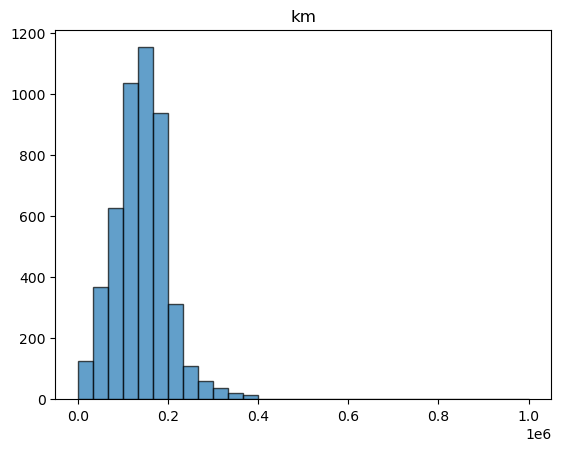

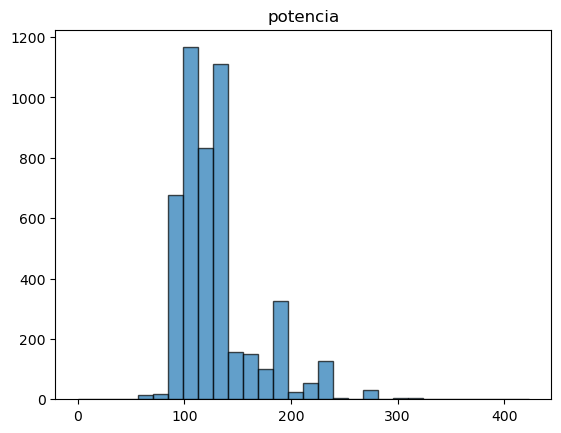

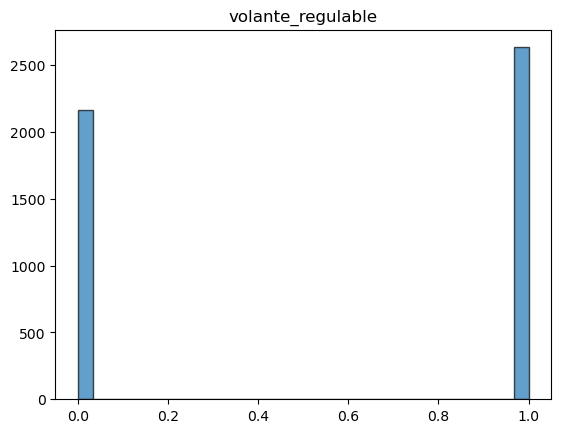

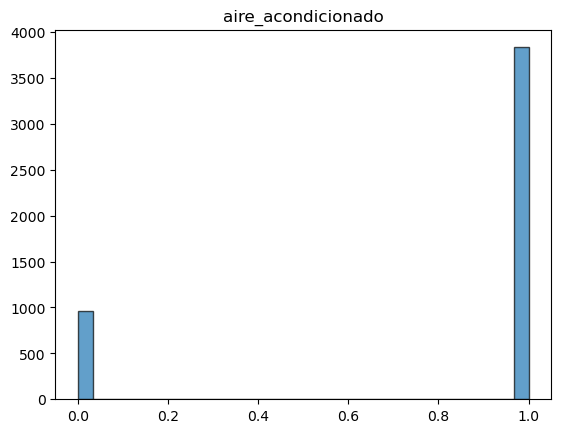

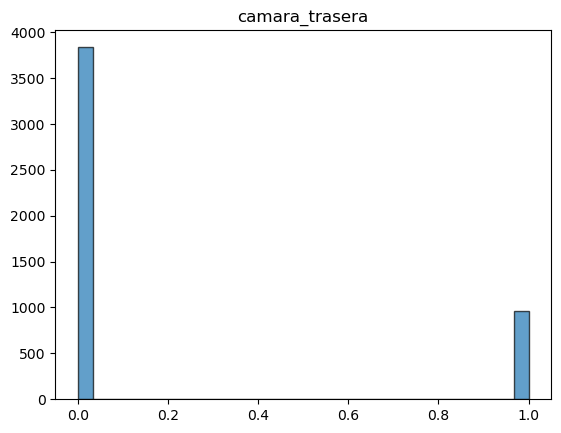

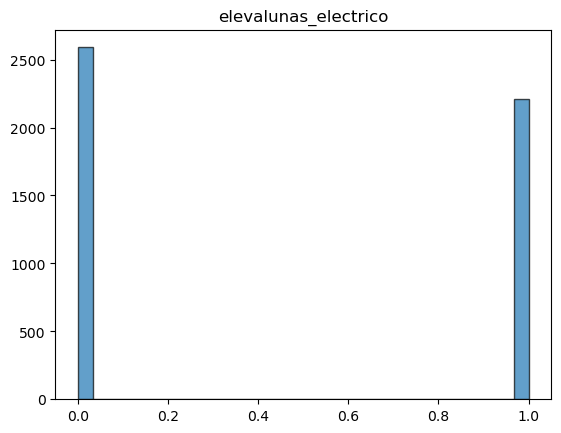

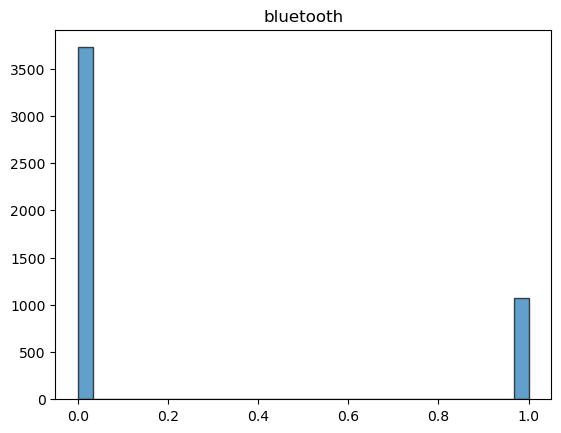

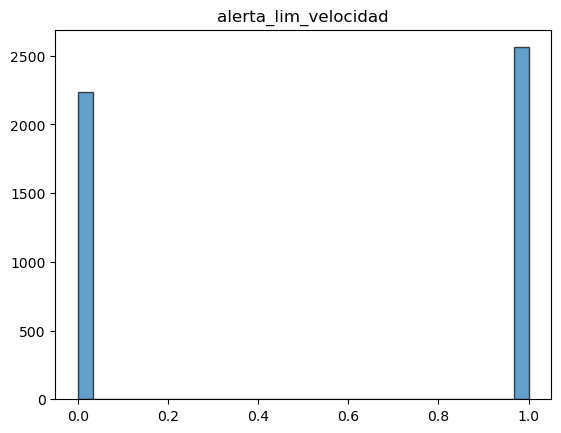

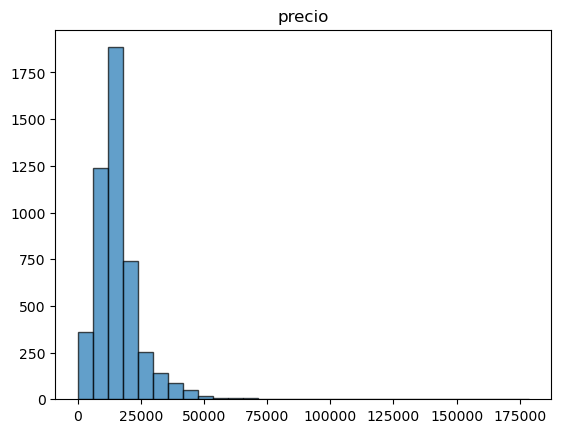

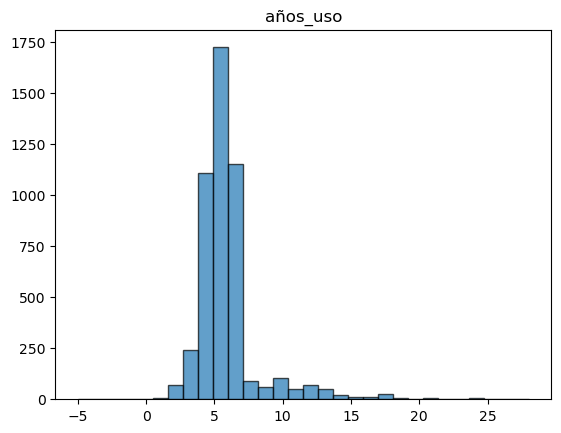

In [94]:
columnas_numericas = bmw.select_dtypes(include=["number"]).columns

# Crear histogramas para cada columna numérica
for columna in columnas_numericas:
    plt.hist(bmw[columna].dropna(), bins=30, edgecolor="black", alpha=0.7)  # Crear histograma
    plt.title(f'{columna}')
    plt.show()  

In [95]:
scaler = MinMaxScaler()
columnas_a_normalizar = ['km', 'potencia','precio', 'años_uso']

In [96]:
bmw[columnas_a_normalizar] = scaler.fit_transform(bmw[columnas_a_normalizar])

In [97]:
bmw

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_uso
0,118,0.140413,0.236407,black,hatchback,1,1,0,1,0,0,0.062780,0.333333
1,M4,0.013987,0.749409,grey,convertible,1,1,0,0,1,1,0.390135,0.242424
2,320,0.183280,0.283688,white,estate,0,0,0,1,0,0,0.056614,0.333333
3,420,0.128043,0.319149,otro_color,convertible,1,1,0,1,1,0,0.140135,0.272727
4,335,0.152349,0.531915,black,coupe,1,1,0,1,1,1,0.095291,0.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,218 Gran Tourer,0.039789,0.260047,black,van,0,1,0,0,0,0,0.081278,0.242424
4795,218 Active Tourer,0.049874,0.236407,grey,van,0,1,0,0,0,1,0.097534,0.242424
4796,218 Gran Tourer,0.019688,0.260047,grey,van,0,1,0,0,0,1,0.094731,0.242424
4797,218 Active Tourer,0.027972,0.260047,brown,van,1,1,0,0,0,1,0.126682,0.212121


In [98]:
bmw = pd.get_dummies(bmw, columns=['color', 'tipo_coche'], drop_first=True)

In [99]:
bmw

,modelo,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,...,color_otro_color,color_silver,color_white,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,118,0.140413,0.236407,1,1,0,1,0,0,0.062780,...,False,False,False,False,False,True,False,False,False,False
1,M4,0.013987,0.749409,1,1,0,0,1,1,0.390135,...,False,False,False,False,False,False,False,False,False,False
2,320,0.183280,0.283688,0,0,0,1,0,0,0.056614,...,False,False,True,False,True,False,False,False,False,False
3,420,0.128043,0.319149,1,1,0,1,1,0,0.140135,...,True,False,False,False,False,False,False,False,False,False
4,335,0.152349,0.531915,1,1,0,1,1,1,0.095291,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,218 Gran Tourer,0.039789,0.260047,0,1,0,0,0,0,0.081278,...,False,False,False,False,False,False,False,False,False,True
4795,218 Active Tourer,0.049874,0.236407,0,1,0,0,0,1,0.097534,...,False,False,False,False,False,False,False,False,False,True
4796,218 Gran Tourer,0.019688,0.260047,0,1,0,0,0,1,0.094731,...,False,False,False,False,False,False,False,False,False,True
4797,218 Active Tourer,0.027972,0.260047,1,1,0,0,0,1,0.126682,...,False,False,False,False,False,False,False,False,False,True


In [100]:
corr1 = bmw.corr(numeric_only = True) # Usamos la función de pandas "corr" que calcula la correlación entre las variables numéricas
corr1.style.background_gradient(cmap='coolwarm') # Con esto obtenemos una tabla que muestra con colores la correlación entre variables

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_uso,color_blue,color_brown,color_grey,color_otro_color,color_silver,color_white,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
km,1.000000,-0.043311,0.068182,-0.007925,0.002542,0.045941,-0.037465,-0.044254,-0.410028,0.460907,-0.020126,-0.022526,0.027209,0.003092,0.025487,-0.068372,-0.062619,0.158232,-0.107610,0.084656,-0.042392,-0.115815,-0.094852
potencia,-0.043311,1.000000,0.327104,0.201777,0.313106,0.344231,0.227842,0.511342,0.645770,-0.095231,-0.009139,-0.052819,-0.002415,-0.014702,0.015006,0.000563,0.121774,-0.045619,-0.237197,0.026010,-0.142603,0.245003,-0.058557
volante_regulable,0.068182,0.327104,1.000000,0.298668,0.253670,0.278660,0.129502,0.229409,0.269368,0.060491,0.012911,0.039974,0.050590,-0.038599,-0.015283,-0.104063,0.035076,-0.016854,-0.170585,0.083112,-0.094202,0.103540,-0.054177
aire_acondicionado,-0.007925,0.201777,0.298668,1.000000,0.141236,0.269113,0.110757,0.221124,0.248271,-0.225695,0.001673,0.057220,0.032288,-0.066214,-0.032533,-0.052816,-0.028436,0.081720,-0.107075,0.071623,-0.109998,-0.020124,0.002616
camara_trasera,0.002542,0.313106,0.253670,0.141236,1.000000,0.196668,0.140382,0.201590,0.254069,0.014401,0.000058,-0.016415,0.014395,-0.041762,0.002071,0.001005,0.017142,-0.036823,-0.048979,-0.005937,-0.047609,0.111961,-0.020409
elevalunas_electrico,0.045941,0.344231,0.278660,0.269113,0.196668,1.000000,0.236129,0.332921,0.264746,-0.081579,-0.034857,-0.020572,-0.015916,-0.027345,-0.031577,0.011363,0.093515,0.047698,-0.099282,0.011491,-0.101772,0.033026,-0.067032
bluetooth,-0.037465,0.227842,0.129502,0.110757,0.140382,0.236129,1.000000,0.102428,0.206742,-0.074973,0.010955,-0.050507,-0.030831,-0.009230,-0.013911,0.047804,0.132868,-0.030991,0.024436,-0.017600,-0.053102,0.001471,-0.024431
alerta_lim_velocidad,-0.044254,0.511342,0.229409,0.221124,0.201590,0.332921,0.102428,1.000000,0.450492,-0.163227,-0.019313,-0.031351,-0.001839,-0.039436,0.011789,0.016354,0.011834,0.006718,-0.193262,0.042429,-0.131037,0.163823,-0.022698
precio,-0.410028,0.645770,0.269368,0.248271,0.254069,0.264746,0.206742,0.450492,1.000000,-0.417428,-0.025843,-0.007394,-0.016517,-0.017726,-0.027638,0.051543,0.094900,-0.196342,-0.119052,-0.004058,-0.089769,0.330238,-0.007046
años_uso,0.460907,-0.095231,0.060491,-0.225695,0.014401,-0.081579,-0.074973,-0.163227,-0.417428,1.000000,0.012470,-0.036451,0.039801,0.016529,0.069563,-0.104929,-0.008012,0.017726,-0.064039,0.099692,0.019212,-0.065555,-0.090798


cambio

git add "Entregable_1/Entregable1/Entregable 1.ipynb"